In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# 1. Leer el CSV
df = pd.read_csv('../data/anxiety_depression_data.csv')

# 2. Tomar 0.5% aleatorio (más manejable para este dataset grande)
df_sample = df.sample(frac=0.005, random_state=42)

# 3. Ver información
print(f"Dataset completo: {df.shape[0]} filas")
print(f"\nColumnas: {df.columns.tolist()}")


Dataset completo: 1200 filas

Columnas: ['Age', 'Gender', 'Education_Level', 'Employment_Status', 'Sleep_Hours', 'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score', 'Depression_Score', 'Stress_Level', 'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Medication_Use', 'Therapy', 'Meditation', 'Substance_Use', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score', 'Life_Satisfaction_Score', 'Loneliness_Score']


In [4]:
# 3. Identificar columnas numéricas para análisis de outliers (usar dataset completo)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nColumnas numéricas detectadas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")





Columnas numéricas detectadas (16):
  - Age
  - Sleep_Hours
  - Physical_Activity_Hrs
  - Social_Support_Score
  - Anxiety_Score
  - Depression_Score
  - Stress_Level
  - Family_History_Mental_Illness
  - Chronic_Illnesses
  - Therapy
  - Meditation
  - Financial_Stress
  - Work_Stress
  - Self_Esteem_Score
  - Life_Satisfaction_Score
  - Loneliness_Score


In [5]:
# 3. Identificar columnas numéricas para análisis de outliers (usar dataset completo)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nColumnas numéricas detectadas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")

# 4. Función para calcular outliers con IQR
def detectar_outliers_iqr(data, columna):
    """
    Detecta outliers usando el método IQR (Interquartile Range)
    
    Parámetros:
    - data: DataFrame
    - columna: nombre de la columna a analizar
    
    Retorna:
    - dict con Q1, Q3, IQR, límites y outliers
    """
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Detectar outliers
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'n_outliers': len(outliers),
        'porcentaje_outliers': (len(outliers) / len(data)) * 100,
        'outliers_indices': outliers.index.tolist()
    }

# 5. Analizar outliers en todas las columnas numéricas
print("\n" + "="*80)
print("ANÁLISIS DE OUTLIERS - MÉTODO IQR")
print("="*80)

resultados_outliers = {}

for col in numeric_cols:
    # Usar dataset completo para cálculos estadísticos
    resultado = detectar_outliers_iqr(df, col)
    resultados_outliers[col] = resultado
    
    print(f"\n📊 {col}:")
    print(f"   Q1 (25%): {resultado['Q1']:.2f}")
    print(f"   Q3 (75%): {resultado['Q3']:.2f}")
    print(f"   IQR: {resultado['IQR']:.2f}")
    print(f"   Límite inferior: {resultado['limite_inferior']:.2f}")
    print(f"   Límite superior: {resultado['limite_superior']:.2f}")
    print(f"   Outliers encontrados: {resultado['n_outliers']} ({resultado['porcentaje_outliers']:.2f}%)")
    




Columnas numéricas detectadas (16):
  - Age
  - Sleep_Hours
  - Physical_Activity_Hrs
  - Social_Support_Score
  - Anxiety_Score
  - Depression_Score
  - Stress_Level
  - Family_History_Mental_Illness
  - Chronic_Illnesses
  - Therapy
  - Meditation
  - Financial_Stress
  - Work_Stress
  - Self_Esteem_Score
  - Life_Satisfaction_Score
  - Loneliness_Score

ANÁLISIS DE OUTLIERS - MÉTODO IQR

📊 Age:
   Q1 (25%): 33.00
   Q3 (75%): 61.00
   IQR: 28.00
   Límite inferior: -9.00
   Límite superior: 103.00
   Outliers encontrados: 0 (0.00%)

📊 Sleep_Hours:
   Q1 (25%): 5.40
   Q3 (75%): 7.50
   IQR: 2.10
   Límite inferior: 2.25
   Límite superior: 10.65
   Outliers encontrados: 6 (0.50%)

📊 Physical_Activity_Hrs:
   Q1 (25%): 0.60
   Q3 (75%): 2.70
   IQR: 2.10
   Límite inferior: -2.55
   Límite superior: 5.85
   Outliers encontrados: 75 (6.25%)

📊 Social_Support_Score:
   Q1 (25%): 3.00
   Q3 (75%): 7.00
   IQR: 4.00
   Límite inferior: -3.00
   Límite superior: 13.00
   Outliers encontr

In [8]:
# 5. Analizar outliers solo en la columna 'Age' (usar dataset completo para estadísticas)
print("\n" + "="*80)
print("ANÁLISIS DE OUTLIERS - MÉTODO IQR (Columna: Age)")
print("="*80)

# Analizar solo Age
col = 'Sleep_Hours'
# Usar el dataset completo `df` para obtener percentiles y detectar outliers
resultado = detectar_outliers_iqr(df, col)

print(f"\n📊 {col}:")
print(f"   Q1 (25%): {resultado['Q1']:.2f}")
print(f"   Q3 (75%): {resultado['Q3']:.2f}")
print(f"   IQR: {resultado['IQR']:.2f}")
print(f"   Límite inferior: {resultado['limite_inferior']:.2f}")
print(f"   Límite superior: {resultado['limite_superior']:.2f}")
print(f"   Outliers encontrados: {resultado['n_outliers']} ({resultado['porcentaje_outliers']:.2f}%)")

# Mostrar los registros que son outliers (desde el dataset completo)
if resultado['n_outliers'] > 0:
    print(f"\n🔍 Registros con outliers en Age:")
    outliers_df = df[df.index.isin(resultado['outliers_indices'])]
else:
    print(f"\n✅ No se encontraron outliers en Age")



ANÁLISIS DE OUTLIERS - MÉTODO IQR (Columna: Age)

📊 Sleep_Hours:
   Q1 (25%): 5.40
   Q3 (75%): 7.50
   IQR: 2.10
   Límite inferior: 2.25
   Límite superior: 10.65
   Outliers encontrados: 6 (0.50%)

🔍 Registros con outliers en Age:


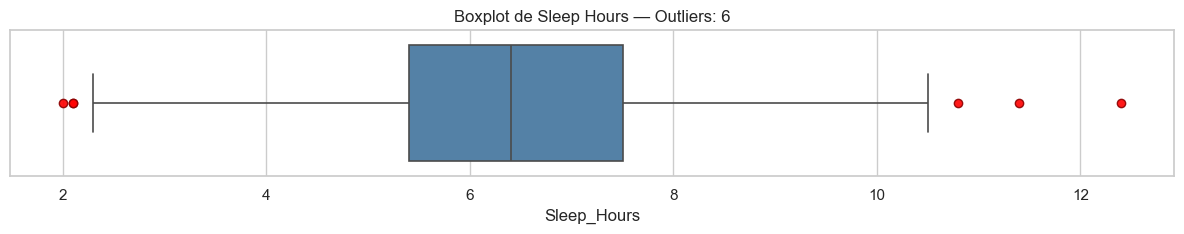

In [19]:
# 7. Visualización simple - Boxplot de Age con outliers resaltados

# Asegurar que 'Age' es numérica y sin NaNs
age_series = pd.to_numeric(df['Sleep_Hours'], errors='coerce').dropna().astype(float)

# Calcular IQR y límites (para información opcional)
Q1 = age_series.quantile(0.25)
Q3 = age_series.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
num_outliers = ((age_series < limite_inferior) | (age_series > limite_superior)).sum()

# Estilo mínimo
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 2.5))

# Mostrar boxplot horizontal con outliers en rojo
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='darkred', markersize=6, alpha=0.9)
sns.boxplot(x=age_series, orient='h', color='steelblue', linewidth=1.2, flierprops=flierprops, whis=1.5, ax=ax)

# Personalización sencilla
ax.set_yticks([])
ax.set_xlabel('Sleep_Hours')
ax.set_title(f'Boxplot de Sleep Hours — Outliers: {num_outliers}', fontsize=12)

plt.tight_layout()
plt.show()


In [27]:
def plot_boxplot_and_hist(data, variable):
    """
    Crea un diagrama de caja junto a un histograma para visualizar la distribución
    
    Parámetros:
    - data: DataFrame
    - variable: nombre de la columna a visualizar
    """
    # Configurar estilo seaborn
    sns.set(style="darkgrid")
    
    # Crear figura con subplots (2 gráficos: boxplot arriba + histograma abajo)
    f, (ax_box, ax_hist) = plt.subplots(
        2, 
        sharex=True,
        figsize=(12, 8),
        gridspec_kw={"height_ratios": (0.30, 0.70)}
    )
    
    # Boxplot HORIZONTAL (arriba) - CON OUTLIERS VISIBLES
    sns.boxplot(
        x=data[variable], 
        ax=ax_box, 
        color='steelblue', 
        linewidth=1.5,
        fliersize=8,
        flierprops=dict(marker='o', markerfacecolor='red', markersize=8, 
                       linestyle='none', markeredgecolor='darkred', alpha=0.7)
    )
    ax_box.set(xlabel='')
    ax_box.set_title('Boxplot', fontsize=14, fontweight='bold')
    ax_box.grid(True, alpha=0.3)
    
    # Calcular bins de 1 en 1
    min_val = data[variable].min()
    max_val = data[variable].max()
    bins = np.arange(int(min_val), int(max_val) + 1, 1)
    
    # Histograma (abajo) - CON BINS DE 1 EN 1
    sns.histplot(
        data=data, 
        x=variable, 
        ax=ax_hist, 
        bins=bins,  
        color='steelblue', 
        kde=False,
        edgecolor='white',
        linewidth=0.5
    )
    
    ax_hist.set_title(variable, fontsize=14, fontweight='bold')
    ax_hist.set_xlabel(variable, fontsize=12)
    ax_hist.set_ylabel('Count', fontsize=12)
    ax_hist.grid(True, alpha=0.3)
    
    # Configurar xticks cada 1 unidad
    ax_hist.set_xticks(bins)
    ax_box.set_xticks(bins)
    
    plt.tight_layout()
    plt.show()


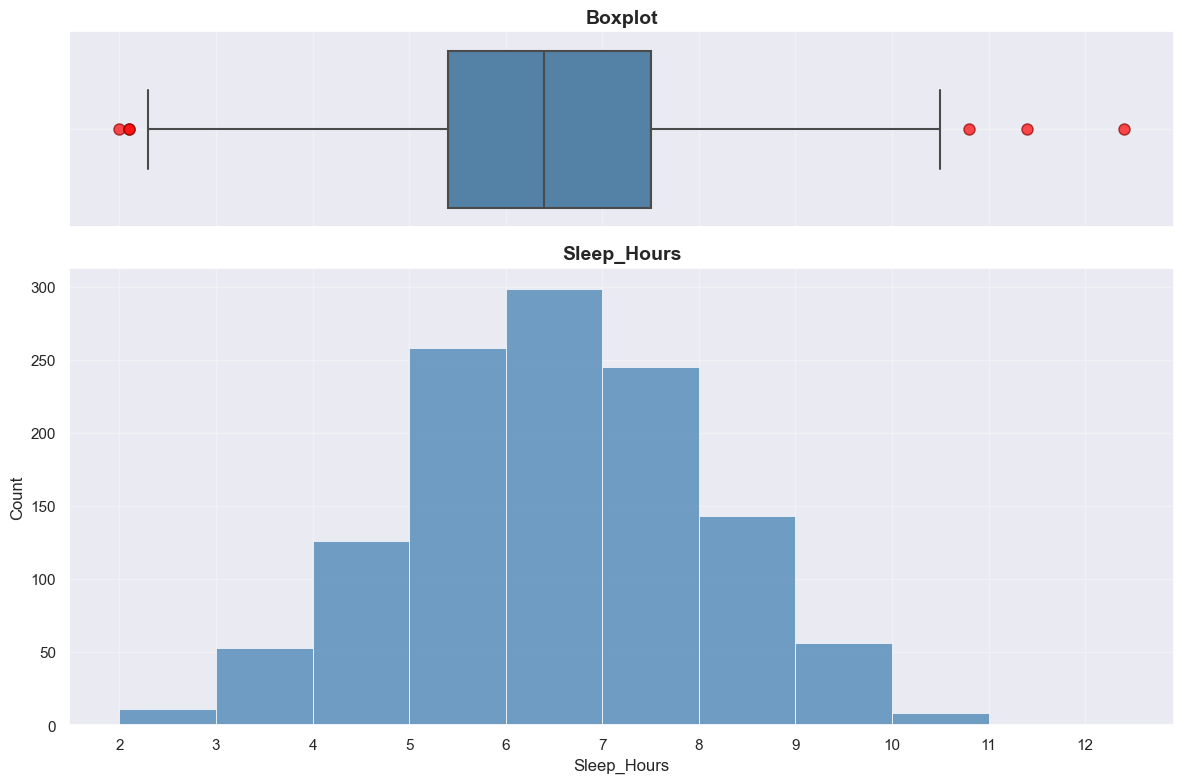

In [28]:
# Usar la función para mostrar boxplot + histograma con el dataset completo (muestra sólo para gráficos rápidos si se desea)
plot_boxplot_and_hist(df, "Sleep_Hours")


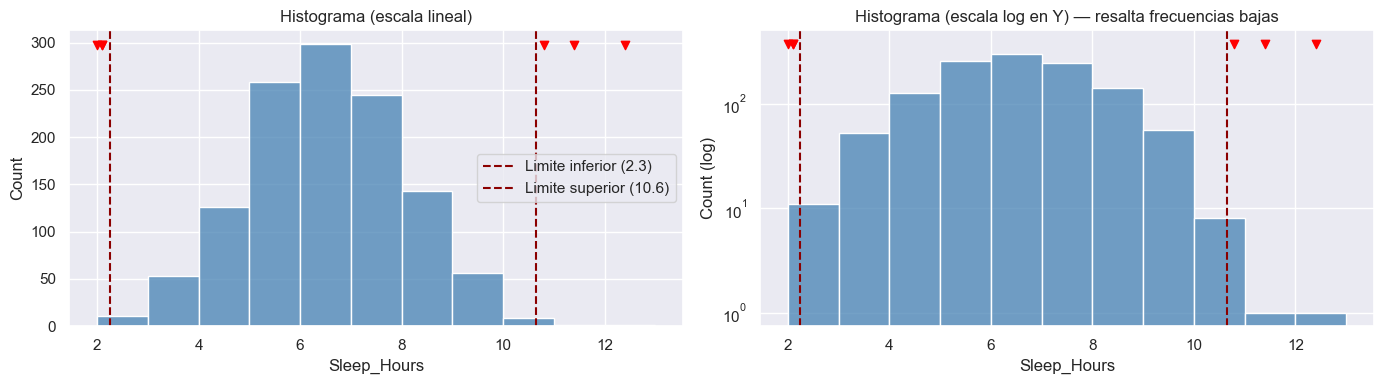

In [29]:
# Histograma adicional: comparación escala lineal vs escala logarítmica (para ver outliers)
# Preparar serie
age_series = pd.to_numeric(df['Sleep_Hours'], errors='coerce').dropna().astype(float)

# Calcular límites IQR y outliers
Q1 = age_series.quantile(0.25)
Q3 = age_series.quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
outliers = age_series[(age_series < lim_inf) | (age_series > lim_sup)]

# Bins (1 año por barra) — puedes cambiar a 5 en 5 si prefieres
min_val = int(np.floor(age_series.min()))
max_val = int(np.ceil(age_series.max()))
bins = np.arange(min_val, max_val + 1, 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# Histograma normal (escala lineal en Y)
ax = axes[0]
sns.histplot(age_series, bins=bins, color='steelblue', edgecolor='white', ax=ax)
ax.set_title('Histograma (escala lineal)')
ax.set_xlabel('Sleep_Hours')
ax.set_ylabel('Count')
ax.axvline(lim_inf, color='darkred', linestyle='--', linewidth=1.5, label=f'Limite inferior ({lim_inf:.1f})')
ax.axvline(lim_sup, color='darkred', linestyle='--', linewidth=1.5, label=f'Limite superior ({lim_sup:.1f})')
# Marcar outliers como triángulos rojos en la parte superior
if len(outliers) > 0:
    ymax = ax.get_ylim()[1]
    ax.scatter(outliers.values, np.full_like(outliers.values, ymax*0.95), marker='v', color='red', zorder=5)
ax.legend()

# Histograma con escala logarítmica en Y
ax = axes[1]
sns.histplot(age_series, bins=bins, color='steelblue', edgecolor='white', ax=ax)
ax.set_yscale('log')
ax.set_title('Histograma (escala log en Y) — resalta frecuencias bajas')
ax.set_xlabel('Sleep_Hours')
ax.set_ylabel('Count (log)')
ax.axvline(lim_inf, color='darkred', linestyle='--', linewidth=1.5)
ax.axvline(lim_sup, color='darkred', linestyle='--', linewidth=1.5)
if len(outliers) > 0:
    ymax = ax.get_ylim()[1]
    ax.scatter(outliers.values, np.full_like(outliers.values, ymax*0.95), marker='v', color='red', zorder=5)

plt.tight_layout()
plt.show()


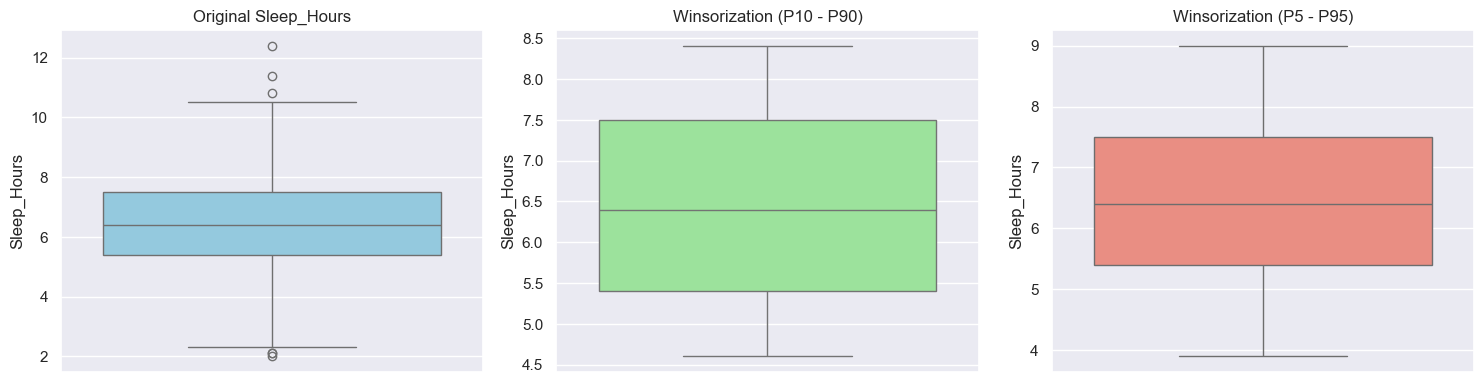

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_winsor_p10 = df.copy()
df_winsor_p5 = df.copy()

# Calculamos percentiles
p10, p90 = df['Sleep_Hours'].quantile(0.10), df['Sleep_Hours'].quantile(0.90)
p5, p95 = df['Sleep_Hours'].quantile(0.05), df['Sleep_Hours'].quantile(0.95)

# Aplicamos winsorización
df_winsor_p10['Sleep_Hours'] = df['Sleep_Hours'].clip(lower=p10, upper=p90)
df_winsor_p5['Sleep_Hours'] = df['Sleep_Hours'].clip(lower=p5, upper=p95)

# Creamos los gráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(y=df['Sleep_Hours'], ax=axes[0], color='skyblue')
axes[0].set_title('Original Sleep_Hours')

sns.boxplot(y=df_winsor_p10['Sleep_Hours'], ax=axes[1], color='lightgreen')
axes[1].set_title('Winsorization (P10 - P90)')

sns.boxplot(y=df_winsor_p5['Sleep_Hours'], ax=axes[2], color='salmon')
axes[2].set_title('Winsorization (P5 - P95)')

plt.tight_layout()
plt.show()


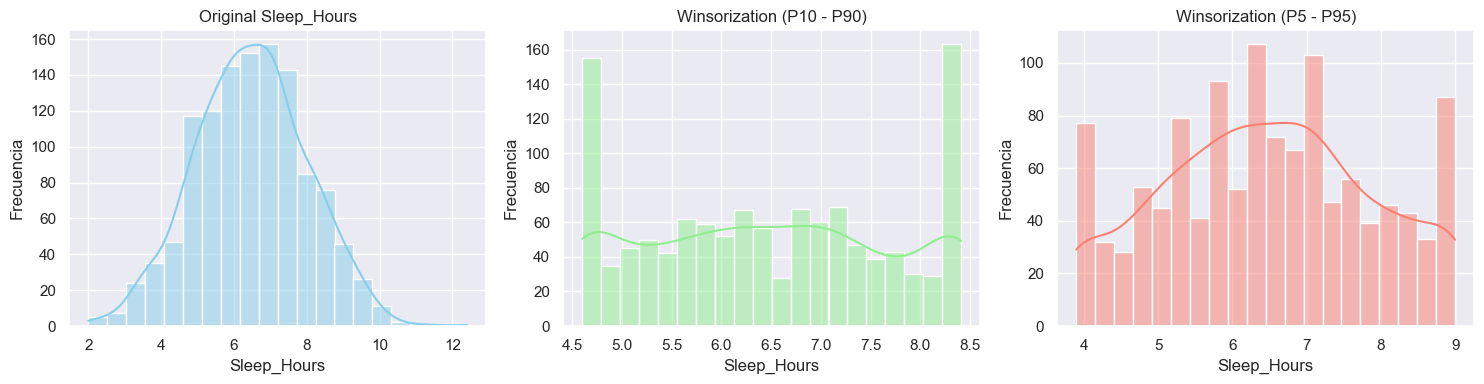

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una figura con 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histograma original
sns.histplot(df['Sleep_Hours'], bins=20, color='skyblue', kde=True, ax=axes[0])
axes[0].set_title('Original Sleep_Hours')
axes[0].set_xlabel('Sleep_Hours')
axes[0].set_ylabel('Frecuencia')

# Histograma con winsorización P10-P90
sns.histplot(df_winsor_p10['Sleep_Hours'], bins=20, color='lightgreen', kde=True, ax=axes[1])
axes[1].set_title('Winsorization (P10 - P90)')
axes[1].set_xlabel('Sleep_Hours')
axes[1].set_ylabel('Frecuencia')

# Histograma con winsorización P5-P95
sns.histplot(df_winsor_p5['Sleep_Hours'], bins=20, color='salmon', kde=True, ax=axes[2])
axes[2].set_title('Winsorization (P5 - P95)')
axes[2].set_xlabel('Sleep_Hours')
axes[2].set_ylabel('Frecuencia')

# Ajuste de diseño
plt.tight_layout()
plt.show()
